###Séries Temporais Previsão com Média Móvel - Janela deslizante

In [78]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [79]:
#criando a variavel arquivo
arquivo = ('champagne_sales.csv')

In [80]:
#lendo a variavel arquivo
serie = read_csv(arquivo, header=0, index_col=0, parse_dates=True, squeeze=True)

In [81]:
#previsão com medias movel janelas deslizantes
variavel = serie.values

In [82]:
#imprimindo a variavel
print(variavel)

[ 2815  2672  2755  2721  2946  3036  2282  2212  2922  4301  5764  7312
  2541  2475  3031  3266  3776  3230  3028  1759  3595  4474  6838  8357
  3113  3006  4047  3523  3937  3986  3260  1573  3528  5211  7614  9254
  5375  3088  3718  4514  4520  4539  3663  1643  4739  5428  8314 10651
  3633  4292  4154  4121  4647  4753  3965  1723  5048  6922  9858 11331
  4016  3957  4510  4276  4968  4677  3523  1821  5222  6872 10803 13916
  2639  2899  3370  3740  2927  3986  4217  1738  5221  6424  9842 13076
  3934  3162  4286  4676  5010  4874  4633  1659  5951  6981  9851 12670
  4348  3564  4577  4788  4618  5312  4298  1413  5877]


In [83]:
#definindo a janela com 3 valores
window = 3

In [84]:
#obtendo os 3 primeiros valors da serie
history = [variavel[i] for i in range(window)]

In [85]:
#imprimindo as 3 valores
history

[2815, 2672, 2755]

In [86]:
#obtendo todos os valores apos os 3 primeiros
test = [variavel[i] for i in range(window, len(variavel))]

In [87]:
#imprimindo o test
print(test)

[2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312, 2541, 2475, 3031, 3266, 3776, 3230, 3028, 1759, 3595, 4474, 6838, 8357, 3113, 3006, 4047, 3523, 3937, 3986, 3260, 1573, 3528, 5211, 7614, 9254, 5375, 3088, 3718, 4514, 4520, 4539, 3663, 1643, 4739, 5428, 8314, 10651, 3633, 4292, 4154, 4121, 4647, 4753, 3965, 1723, 5048, 6922, 9858, 11331, 4016, 3957, 4510, 4276, 4968, 4677, 3523, 1821, 5222, 6872, 10803, 13916, 2639, 2899, 3370, 3740, 2927, 3986, 4217, 1738, 5221, 6424, 9842, 13076, 3934, 3162, 4286, 4676, 5010, 4874, 4633, 1659, 5951, 6981, 9851, 12670, 4348, 3564, 4577, 4788, 4618, 5312, 4298, 1413, 5877]


In [88]:
#criando uma variavel prediçoes para ver 
# a comparação no final
predicoes = []

In [89]:
# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  

  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
   
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))  

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [90]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))  

In [91]:
#imprimindo a  metrica
print('Metrica RMSE: %.3f' %rmse)

Metrica RMSE: 2960.299


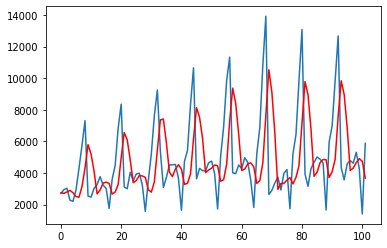

In [92]:
# plot o valor real (test) e as predições 
pyplot.plot(test) 
pyplot.plot(predicoes, color='red')
pyplot.show()